In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from pylab import subplot,imshow,title,gray,NullLocator
import scipy.misc as mi
import scipy.special as sp
from PIL import Image
from itertools import chain
from sklearn.metrics import confusion_matrix, accuracy_score


from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
from keras.models import model_from_json

from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')

Using Theano backend.


In [2]:
# visualizza dati
def displayData(X, t, rows=10, cols=10, img_ind=None, size =16, class_value = False):
    if len(X)>rows*cols:
        img_ind = np.random.permutation(len(X))[0:rows * cols]
    else:
        img_ind = range(rows*cols)
    fig = plt.figure(figsize = (size,size))
    fig.patch.set_facecolor('white')
    ax = fig.gca()
    for i in range(100):
        plt.subplot(10,10,i+1)
        plt.imshow([255-x for x in X[img_ind[i]]], cmap='gray', interpolation='gaussian')
        if class_value:
            plt.title("{}".format(t[img_ind[i]]),fontsize = 20)
        plt.gca().xaxis.set_major_locator(plt.NullLocator())
        plt.gca().yaxis.set_major_locator(plt.NullLocator())
        plt.axis('off')
    plt.subplots_adjust(top=1)
    plt.show()

In [3]:
def plotData(X, Y, c, npixel=28):
    m, n = X.shape
    image = np.array(X[c,:])
    plt.figure(figsize = (6,6))
    plt.imshow((image.reshape(npixel, npixel)), cmap='Greys', interpolation='quadric')
    plt.show()

In [4]:
def plotAccuracy(acc_history_train, acc_history_test):
    plt.figure(figsize = (12,8))
    plt.plot(acc_history_train, marker='o', markersize=5, label='Train')
    plt.plot(acc_history_test, marker='o', markersize=5, label='Test')
    plt.legend()
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.show()

In [5]:
def save_model(m,filename):
    model_json = m.to_json()
    with open(filename+".json", "w") as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
    m.save_weights(filename+".h5")
    print("Saved model to disk")

In [6]:
def load_model(filename):
    json_file = open(filename+'.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    m = model_from_json(loaded_model_json)
    # load weights into new model
    m.load_weights(filename+".h5")
    print("Loaded model from disk")
    return m

Fissa il numero di classi. Leggi i dati.

In [7]:
nb_classes = 10

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [8]:
X_test.shape

(10000, 28, 28)

Esempio di dati

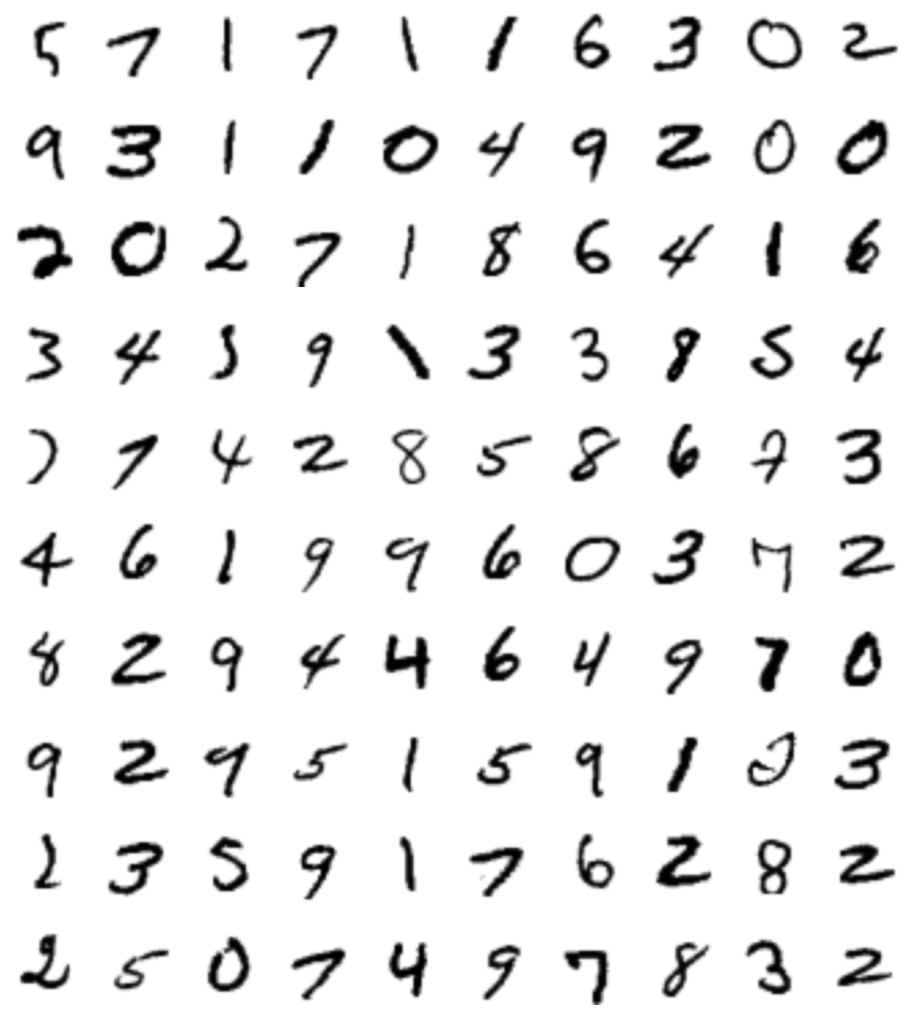

In [9]:
displayData(X_train[100:200], y_train[100:200])

Esempio di dati con relativa classe

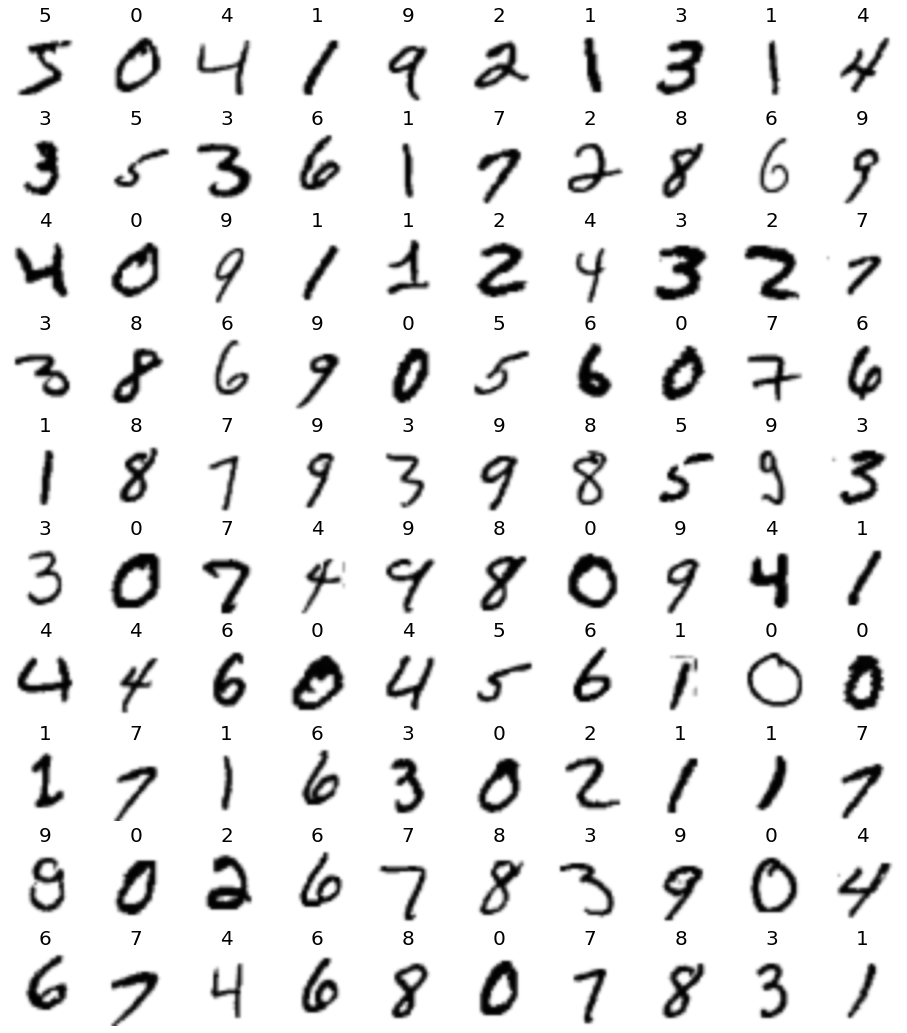

In [10]:
displayData(X_train[0:100], y_train[0:100], class_value=True)

In [11]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [12]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

Costruisci il modello (insieme delle possibili funzioni), definendo una funzione di costo da 

In [13]:
# softmax regression
model0 = Sequential()
model0.add(Dense(10, input_shape=(784,)))
model0.add(Activation('softmax'))
model0.compile(loss='categorical_crossentropy', metrics=['acc'], optimizer='adam')

Cerca la migliore funzione possibile, rispetto ai dati disponibili

In [14]:
history0 = model0.fit(X_train, Y_train, batch_size=2048, epochs=20, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 13us/step - loss: 1.7705 - acc: 0.5007 - val_loss: 1.2754 - val_acc: 0.7446
Epoch 2/20
60000/60000 [==============================] - 0s 6us/step - loss: 1.0719 - acc: 0.7788 - val_loss: 0.8634 - val_acc: 0.8224
Epoch 3/20
60000/60000 [==============================] - 0s 7us/step - loss: 0.7956 - acc: 0.8277 - val_loss: 0.6855 - val_acc: 0.8518
Epoch 4/20
60000/60000 [==============================] - 0s 6us/step - loss: 0.6621 - acc: 0.8498 - val_loss: 0.5894 - val_acc: 0.8677
Epoch 5/20
60000/60000 [==============================] - 0s 6us/step - loss: 0.5827 - acc: 0.8626 - val_loss: 0.5273 - val_acc: 0.8803
Epoch 6/20
60000/60000 [==============================] - 0s 6us/step - loss: 0.5296 - acc: 0.8733 - val_loss: 0.4843 - val_acc: 0.8890
Epoch 7/20
60000/60000 [==============================] - 0s 6us/step - loss: 0.4913 - acc: 0.8796 - val_loss: 0.4527 - val_acc: 0.89

Accuracy: frazione di risposte corrette

In [22]:
acc_values0 = history0.history['acc']
val_acc_values0 = history0.history['val_acc']

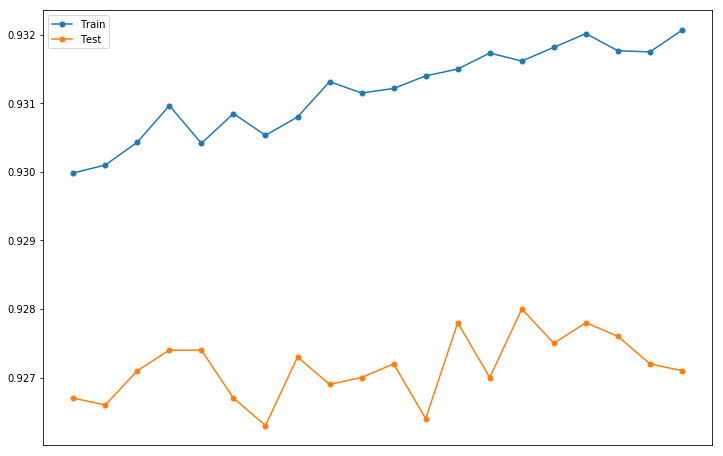

In [23]:
plotAccuracy(acc_values0, val_acc_values0)

In [24]:
predictions_train = model0.predict_classes(X_train, verbose=0)

In [25]:
confusion_matrix(y_train, predictions_train)

array([[5745,    1,   20,   10,   11,   38,   39,    7,   47,    5],
       [   1, 6564,   38,   17,    6,   29,    2,   12,   62,   11],
       [  28,   49, 5440,   82,   66,   19,   63,   67,  124,   20],
       [  16,   25,  134, 5542,    7,  179,   18,   46,  111,   53],
       [  11,   28,   27,    6, 5491,    5,   51,   16,   33,  174],
       [  49,   25,   43,  141,   54, 4862,   82,   16,  109,   40],
       [  29,   13,   36,    0,   37,   66, 5708,    3,   25,    1],
       [  12,   23,   60,   19,   47,    8,    3, 5886,   14,  193],
       [  30,  101,   59,  128,   28,  138,   38,   12, 5251,   66],
       [  21,   21,   17,   76,  143,   35,    2,  153,   40, 5441]])

In [26]:
accuracy_score(y_train, predictions_train)

0.9321666666666667

In [33]:
predictions_test = model0.predict_classes(X_test, verbose=0)

In [34]:
confusion_matrix(y_test, predictions_test)

array([[ 959,    0,    2,    2,    0,    5,    7,    3,    2,    0],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   5,    8,  929,   16,    7,    4,   12,   10,   37,    4],
       [   3,    0,   20,  923,    1,   25,    2,    9,   19,    8],
       [   1,    1,    3,    2,  921,    0,   11,    4,    9,   30],
       [   8,    3,    3,   31,   11,  782,   15,    7,   27,    5],
       [   9,    3,    8,    1,    7,   12,  914,    2,    2,    0],
       [   1,    6,   24,    5,    8,    1,    0,  945,    2,   36],
       [   7,    9,    6,   20,    9,   27,    8,   11,  867,   10],
       [  11,    7,    1,    9,   27,    6,    0,   20,    7,  921]])

In [35]:
accuracy_score(y_test, predictions_test)

0.9271

In [36]:
w = model0.layers[0].get_weights()[0]

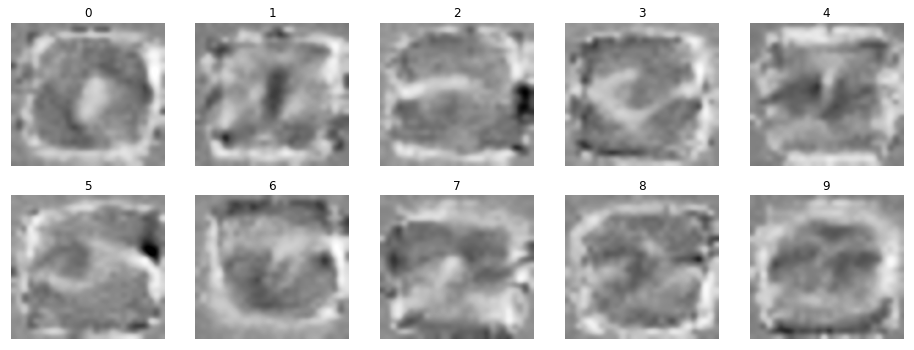

In [37]:
fig = plt.figure(figsize=(16,16))
fig.patch.set_facecolor('white')
for i in range(10):
    ax = subplot(2,5,i+1,frame_on=False, facecolor="#F8F8F8")
    ax.xaxis.set_major_locator(NullLocator())
    ax.yaxis.set_major_locator(NullLocator())
    imshow(w[:,i].reshape(28,28), interpolation='quadric', 
           cmap=plt.get_cmap('Greys'), vmin=np.mean(w[:,i])-3.5*np.std(w[:,i]), 
           vmax=np.mean(w[:,i])+3.5*np.std(w[:,i]), aspect='auto')
    plt.title(i)
plt.subplots_adjust(top=0.4)
plt.show()

Elemento 7737


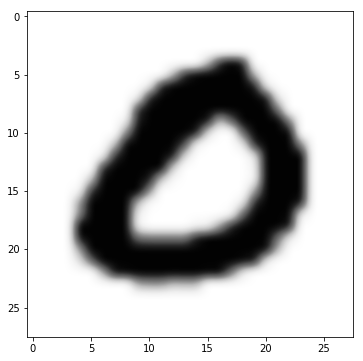

Un 0, classificato come 0


In [38]:
c = np.random.randint(0, X_test.shape[0])
p=model0.predict_classes(X_test[c:c+1,:], verbose=0)
print("Elemento "+str(c))
plotData(X_test, y_test, c)
print("Un "+str(y_test[c])+", classificato come " + str(p[0]))

In [39]:
# 3 layer NN
hidden_layer_width = 50
model1 = Sequential()
model1.add(Dense(hidden_layer_width, input_shape=(784,)))
model1.add(Activation('relu'))
model1.add(Dropout(0.2))
model1.add(Dense(10))
model1.add(Activation('softmax'))
model1.compile(loss='categorical_crossentropy', metrics=['acc'], optimizer='adam')

In [40]:
history1 = model1.fit(X_train, Y_train, batch_size=512, epochs=30, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 1s 14us/step - loss: 0.8800 - acc: 0.7465 - val_loss: 0.3706 - val_acc: 0.901
Epoch 2/30
60000/60000 [==============================] - 1s 13us/step - loss: 0.3941 - acc: 0.8860 - val_loss: 0.2812 - val_acc: 0.91
Epoch 3/30
60000/60000 [==============================] - 1s 17us/step - loss: 0.3161 - acc: 0.9084 - val_loss: 0.2351 - val_acc: 0.932
Epoch 4/30
60000/60000 [==============================] - 1s 14us/step - loss: 0.2739 - acc: 0.9211 - val_loss: 0.2066 - val_acc: 0.93
Epoch 5/30
60000/60000 [==============================] - 1s 17us/step - loss: 0.2460 - acc: 0.9288 - val_loss: 0.1862 - val_acc: 0.94
Epoch 6/30
60000/60000 [==============================] - 1s 14us/step - loss: 0.2259 - acc: 0.9340 - val_loss: 0.1726 - val_acc: 0.947
Epoch 7/30
60000/60000 [==============================] - 1s 15us/step - loss: 0.2089 - acc: 0.9395 - val_loss: 0.1604 - val_acc: 0.95
Ep

In [95]:
acc_values1 = history1.history['acc']
val_acc_values1 = history1.history['val_acc']

epochs1 = range(1, len(acc_values1) + 1)

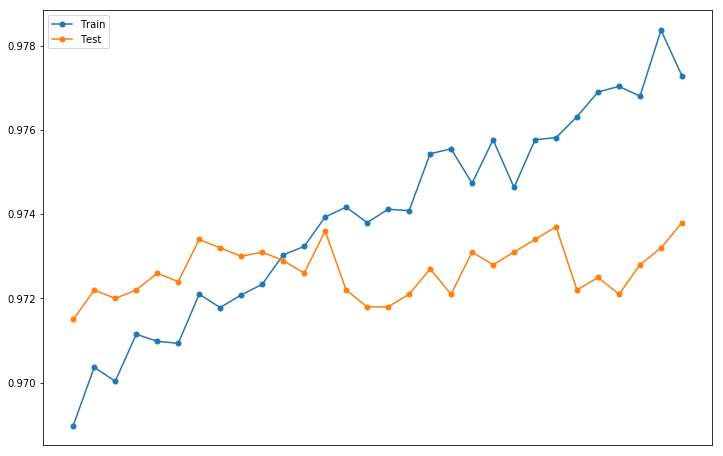

In [96]:
plotAccuracy(acc_values1, val_acc_values1)

In [97]:
predictions_train = model1.predict_classes(X_train, verbose=0)

In [98]:
confusion_matrix(y_train, predictions_train)

array([[5911,    0,    1,    1,    1,    1,    2,    0,    4,    2],
       [   1, 6711,    7,    7,    3,    0,    0,    6,    7,    0],
       [   8,    1, 5914,    6,    4,    0,    0,   12,    9,    4],
       [   2,    3,   25, 6054,    0,   16,    0,   14,   11,    6],
       [   2,    4,    2,    0, 5808,    0,    5,    3,    2,   16],
       [   5,    0,    4,   14,    1, 5388,    4,    0,    2,    3],
       [  12,    3,    1,    0,    4,    8, 5886,    0,    4,    0],
       [   2,    7,   14,    1,   12,    0,    0, 6222,    1,    6],
       [   4,    7,    4,   11,    3,    8,    2,    1, 5806,    5],
       [   9,    2,    0,    9,   21,    5,    0,   14,    7, 5882]])

In [99]:
accuracy_score(y_train, predictions_train)

0.9930333333333333

In [100]:
predictions_test = model1.predict_classes(X_test, verbose=0)

In [101]:
confusion_matrix(y_test, predictions_test)

array([[ 968,    0,    0,    2,    3,    1,    3,    1,    1,    1],
       [   0, 1121,    3,    3,    0,    1,    2,    2,    3,    0],
       [   2,    3, 1000,    5,    4,    1,    2,    6,    9,    0],
       [   0,    0,    8,  983,    1,    8,    1,    6,    3,    0],
       [   0,    0,    4,    0,  957,    0,    8,    3,    2,    8],
       [   3,    1,    1,   13,    2,  861,    5,    2,    3,    1],
       [   9,    3,    1,    0,    3,    5,  935,    0,    2,    0],
       [   2,    4,   12,    1,    2,    0,    0, 1002,    1,    4],
       [   4,    2,    5,    6,    5,    5,    1,    6,  939,    1],
       [   1,    4,    0,   10,   11,    1,    1,    6,    3,  972]])

In [102]:
accuracy_score(y_test, predictions_test)

0.9738

In [103]:
w0 = model1.layers[0].get_weights()[0]
w1 = model1.layers[3].get_weights()[0]
w = np.dot(w0,w1)

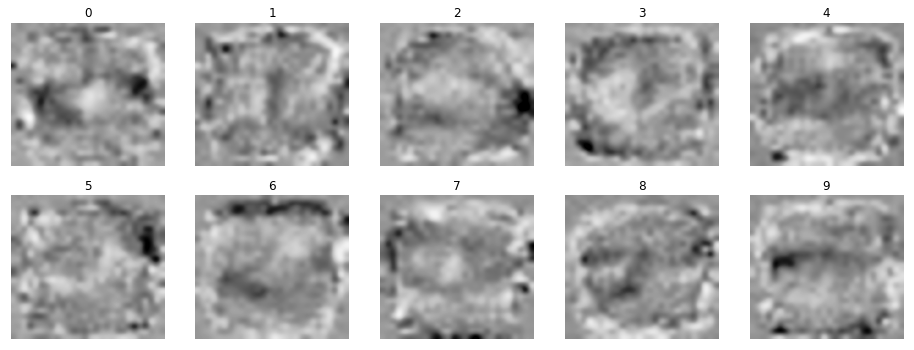

In [104]:
fig = plt.figure(figsize=(16,16))
fig.patch.set_facecolor('white')
for i in range(10):
    ax = subplot(2,5,i+1,frame_on=False, facecolor="#F8F8F8")
    ax.xaxis.set_major_locator(NullLocator())
    ax.yaxis.set_major_locator(NullLocator())
    imshow(w[:,i].reshape(28,28), interpolation='quadric', 
           cmap=plt.get_cmap('Greys'), vmin=np.mean(w[:,i])-3.5*np.std(w[:,i]), 
           vmax=np.mean(w[:,i])+3.5*np.std(w[:,i]), aspect='auto')
    plt.title(i)
plt.subplots_adjust(top=0.4)
plt.show()

In [105]:
# 4 layer NN
hidden_layer1_width = 120
hidden_layer2_width = 50
model2 = Sequential()
model2.add(Dense(hidden_layer1_width, input_shape=(784,)))
model2.add(Activation('relu'))
model2.add(Dropout(0.2))
model2.add(Dense(hidden_layer2_width))
model2.add(Activation('relu'))
model2.add(Dropout(0.2))
model2.add(Dense(10))
model2.add(Activation('softmax'))

In [106]:
model2.compile(loss='categorical_crossentropy', metrics=['acc'], optimizer='adam')

In [111]:
history2 = model2.fit(X_train, Y_train, batch_size=1024, epochs=10, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 30us/step - loss: 0.0775 - acc: 0.9760 - val_loss: 0.0732 - val_acc: 0.978
Epoch 2/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.0756 - acc: 0.9767 - val_loss: 0.0730 - val_acc: 0.97
Epoch 3/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.0720 - acc: 0.9785 - val_loss: 0.0732 - val_acc: 0.97
Epoch 4/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.0690 - acc: 0.9788 - val_loss: 0.0708 - val_acc: 0.979
Epoch 5/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.0671 - acc: 0.9790 - val_loss: 0.0704 - val_acc: 0.97
Epoch 6/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.0647 - acc: 0.9795 - val_loss: 0.0692 - val_acc: 0.97
Epoch 7/10
60000/60000 [==============================] - 1s 23us/step - loss: 0.0640 - acc: 0.9797 - val_loss: 0.0691 - val_acc: 0.97
Epo

In [112]:
acc_values2 = history2.history['acc']
val_acc_values2 = history2.history['val_acc']

epochs2 = range(1, len(acc_values2) + 1)

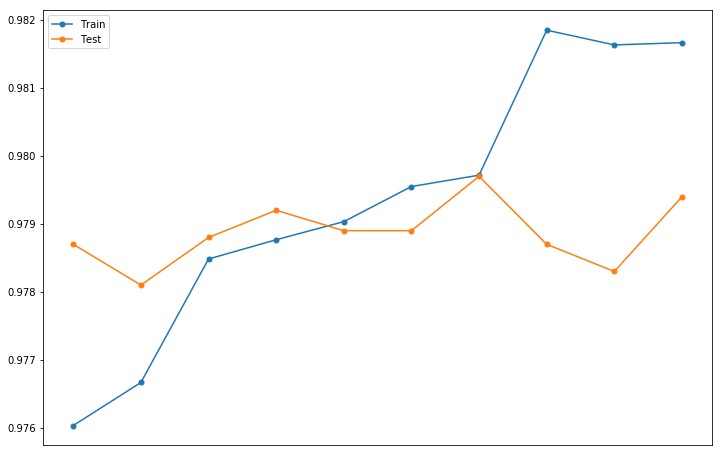

In [113]:
plotAccuracy(acc_values2, val_acc_values2)

In [114]:
predictions_train = model2.predict_classes(X_train, verbose=0)

In [115]:
confusion_matrix(y_train, predictions_train)

array([[5910,    1,    1,    0,    1,    1,    6,    0,    2,    1],
       [   1, 6713,   12,    2,    3,    0,    1,    7,    3,    0],
       [   5,    1, 5930,    3,    4,    2,    0,    6,    5,    2],
       [   3,    0,   24, 6058,    0,    8,    0,   10,   18,   10],
       [   1,    6,    1,    0, 5819,    0,    4,    2,    1,    8],
       [   5,    1,    1,    4,    0, 5391,    5,    0,    9,    5],
       [   5,    3,    0,    0,    2,    5, 5900,    0,    3,    0],
       [   2,   14,   12,    0,    3,    0,    0, 6224,    1,    9],
       [   6,    7,    4,    3,    2,    7,    1,    0, 5819,    2],
       [   3,    3,    0,    3,   11,    9,    0,   13,    8, 5899]])

In [116]:
accuracy_score(y_train, predictions_train)

0.9943833333333333

In [117]:
predictions_test = model2.predict_classes(X_test, verbose=0)

In [118]:
confusion_matrix(y_test, predictions_test)

array([[ 971,    0,    1,    0,    0,    0,    3,    1,    4,    0],
       [   0, 1124,    3,    1,    0,    1,    2,    1,    3,    0],
       [   5,    1, 1009,    3,    2,    1,    1,    4,    6,    0],
       [   0,    0,    4,  988,    0,    5,    0,    6,    4,    3],
       [   0,    0,    3,    0,  965,    0,    6,    0,    0,    8],
       [   2,    0,    0,    9,    2,  870,    2,    0,    4,    3],
       [   4,    3,    0,    1,    2,    4,  940,    1,    3,    0],
       [   2,    8,   11,    1,    1,    0,    0,  998,    0,    7],
       [   5,    0,    2,    3,    5,    3,    3,    2,  949,    2],
       [   1,    2,    0,    5,    8,    5,    1,    4,    3,  980]])

In [ ]:
accuracy_score(y_test, predictions_test)

In [ ]:
w0 = model2.layers[0].get_weights()[0]
w1 = model2.layers[3].get_weights()[0]
w2 = model2.layers[6].get_weights()[0]
w = np.dot(np.dot(w0,w1),w2)

In [ ]:
fig = plt.figure(figsize=(16,16))
fig.patch.set_facecolor('white')
for i in range(10):
    ax = subplot(2,5,i+1,frame_on=False, facecolor="#F8F8F8")
    ax.xaxis.set_major_locator(NullLocator())
    ax.yaxis.set_major_locator(NullLocator())
    imshow(w[:,i].reshape(28,28), interpolation='quadric', 
           cmap=plt.get_cmap('Greys'), vmin=np.mean(w[:,i])-3.5*np.std(w[:,i]), 
           vmax=np.mean(w[:,i])+3.5*np.std(w[:,i]), aspect='auto')
    plt.title(i)
plt.subplots_adjust(top=0.4)
plt.show()

In [ ]:
model3 = Sequential()
model3.add(Conv2D(30, (5, 5), input_shape=(1, 28, 28), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Conv2D(15, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.2))
model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(Dense(50, activation='relu'))
model3.add(Dense(10, activation='softmax'))

In [ ]:
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
X_train_c = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test_c = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

In [ ]:
history3 = model3.fit(X_train_c, Y_train, batch_size=1024, epochs=10, verbose=1, validation_data=(X_test_c, Y_test))

In [ ]:
acc_values3 = history3.history['acc']
val_acc_values3 = history3.history['val_acc']

epochs3 = range(1, len(acc_values3) + 1)

In [ ]:
plotAccuracy(acc_values3, val_acc_values3)

In [ ]:
predictions_train = model3.predict_classes(X_train_c, verbose=0)

In [ ]:
confusion_matrix(y_train, predictions_train)

In [ ]:
accuracy_score(y_train, predictions_train)

In [ ]:
predictions_test = model3.predict_classes(X_test, verbose=0)

In [298]:
confusion_matrix(y_test, predictions_test)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 7s 118us/step - loss: 0.5988 - acc: 0.8342 - val_loss: 0.2581 - val_acc: 0.9267
Epoch 2/30
60000/60000 [==============================] - 6s 106us/step - loss: 0.2404 - acc: 0.9335 - val_loss: 0.1884 - val_acc: 0.9469
Epoch 3/30
60000/60000 [==============================] - 6s 98us/step - loss: 0.1823 - acc: 0.9488 - val_loss: 0.1505 - val_acc: 0.9574
Epoch 4/30
60000/60000 [==============================] - 6s 94us/step - loss: 0.1467 - acc: 0.9587 - val_loss: 0.1265 - val_acc: 0.9630
Epoch 5/30
60000/60000 [==============================] - 6s 96us/step - loss: 0.1226 - acc: 0.9650 - val_loss: 0.1107 - val_acc: 0.9669
Epoch 6/30
60000/60000 [==============================] - 6s 99us/step - loss: 0.1047 - acc: 0.9704 - val_loss: 0.1022 - val_acc: 0.9699
Epoch 7/30
60000/60000 [==============================] - 6s 106us/step - loss: 0.0930 - acc: 0.9741 - val_loss: 0.0907 - val_

In [ ]:
accuracy_score(y_test, predictions_test)